In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from neupy.estimators import mse

In [2]:
datasets = pd.read_excel('/Users/Evan/DataScience/TB_Nation/TB_nation.xlsx',index_col='Date')
datasets = datasets[['Incidence_rate','Year']]

In [3]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=12,center=False).mean()
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(8, 6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [4]:
datasets['first_diff'] = datasets.Incidence_rate - datasets.Incidence_rate.shift(1)
datasets['seasonal_difference'] = datasets.Incidence_rate - datasets.Incidence_rate.shift(12)  
datasets['seasonal_first_difference'] = datasets.first_diff-datasets.first_diff.shift(12)
# datasets = datasets.loc['2005-02-01':,]

In [5]:
datasets.shape

(132, 5)

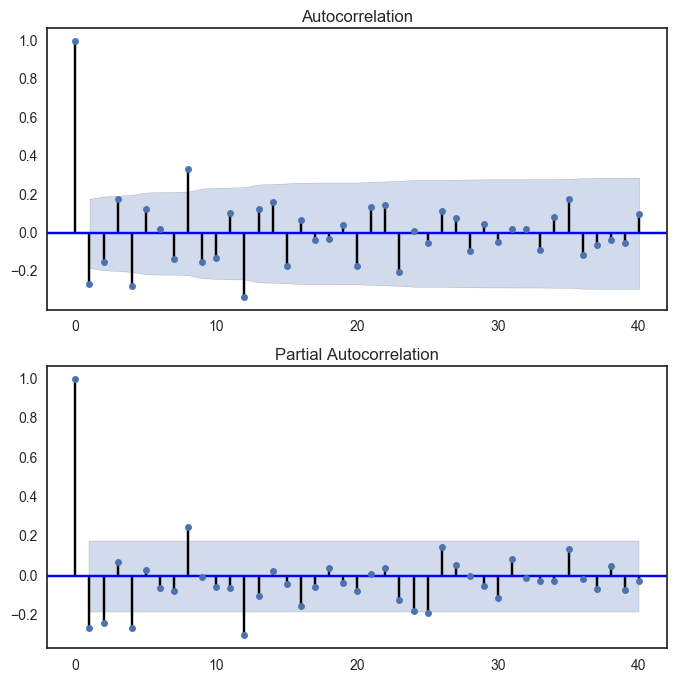

In [6]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datasets.seasonal_first_difference.iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datasets.seasonal_first_difference.iloc[13:],lags=40, ax=ax2)
# fig.savefig('Autocorrection.png',dpi=600)

In [7]:
mod = sm.tsa.SARIMAX(datasets.Incidence_rate, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     Incidence_rate   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -98.118
Date:                            Sat, 15 Oct 2016   AIC                            202.236
Time:                                    19:52:19   BIC                            210.884
Sample:                                01-01-2004   HQIC                           205.750
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4157      0.066     -6.315      0.000      -0.545      -0.287
ma.S.L12      -0.4314      0.065   

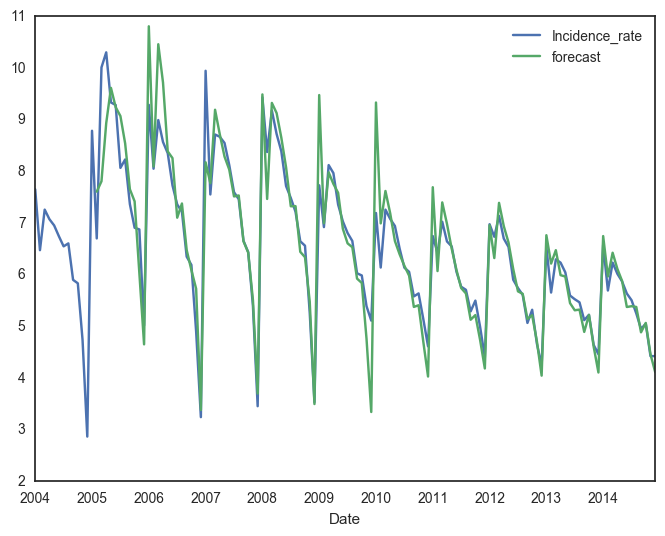

In [8]:
datasets['forecast'] = results.predict(start = 13, end= 131, dynamic= False)  
datasets[['Incidence_rate','forecast']].plot(figsize=(8, 6))

In [9]:
# dta = pd.concat([datasets, datasets_pred])[['Incidence_rate','Year','forecast']]

In [10]:
dta = datasets

In [21]:
datasets

,Incidence_rate,Year,first_diff,seasonal_difference,seasonal_first_difference,forecast
Date,,,,,,
2004-01-01,7.651937,2004,NaN,NaN,NaN,NaN
2004-02-01,6.474136,2004,-1.177801,NaN,NaN,NaN
2004-03-01,7.259132,2004,0.784996,NaN,NaN,NaN
2004-04-01,7.073268,2004,-0.185863,NaN,NaN,NaN
2004-05-01,6.952873,2004,-0.120396,NaN,NaN,NaN
2004-06-01,6.743776,2004,-0.209096,NaN,NaN,NaN
2004-07-01,6.548066,2004,-0.195710,NaN,NaN,NaN
2004-08-01,6.605225,2004,0.057159,NaN,NaN,NaN
2004-09-01,5.899468,2004,-0.705757,NaN,NaN,NaN


In [11]:
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,132)]
future = pd.DataFrame(index=date_list, columns= dta.columns)
TB_future = pd.concat([dta,future])

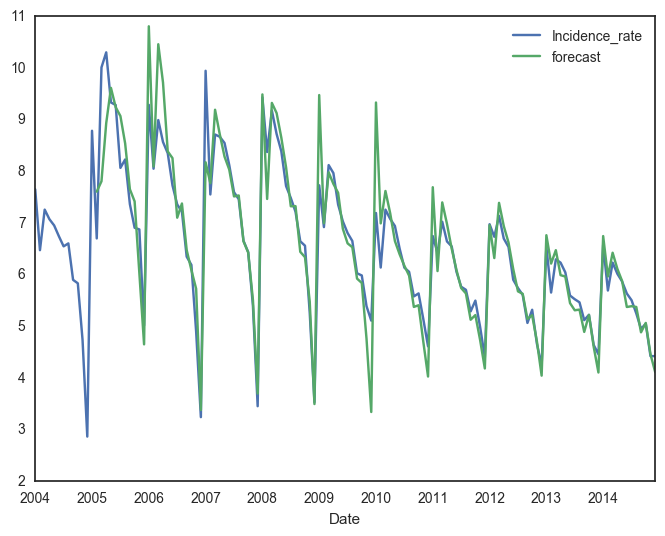

In [12]:
dta[['Incidence_rate','forecast']].plot(figsize=(8,6))

In [13]:
start = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,132)]
future = pd.DataFrame(index=date_list, columns= dta.columns)
TB_future = pd.concat([dta, future])

In [14]:
TB_future['forecast'] = results.predict(start = 1, end = 263, dynamic= False)
TB_future['Year'] = TB_future.index.year

In [15]:
TB_future.ix[107:132,]

,Incidence_rate,Year,first_diff,seasonal_difference,seasonal_first_difference,forecast
2012-12-01,4.236613,2012,-0.427877,-0.163757,0.162245,4.045606
2013-01-01,6.538876,2013,2.302264,-0.437336,-0.273579,6.763615
2013-02-01,5.653969,2013,-0.884907,-1.079694,-0.642357,6.215233
2013-03-01,6.296343,2013,0.642374,-0.840481,0.239212,6.473515
2013-04-01,6.232829,2013,-0.063514,-0.466173,0.374309,5.990802
2013-05-01,6.045021,2013,-0.187808,-0.491217,-0.025044,5.963563
2013-06-01,5.595773,2013,-0.449248,-0.304847,0.186370,5.449157
2013-07-01,5.524578,2013,-0.071194,-0.216543,0.088304,5.310657
2013-08-01,5.464757,2013,-0.059821,-0.144698,0.071845,5.324071
2013-09-01,5.119716,2013,-0.345042,0.053697,0.198396,4.892390


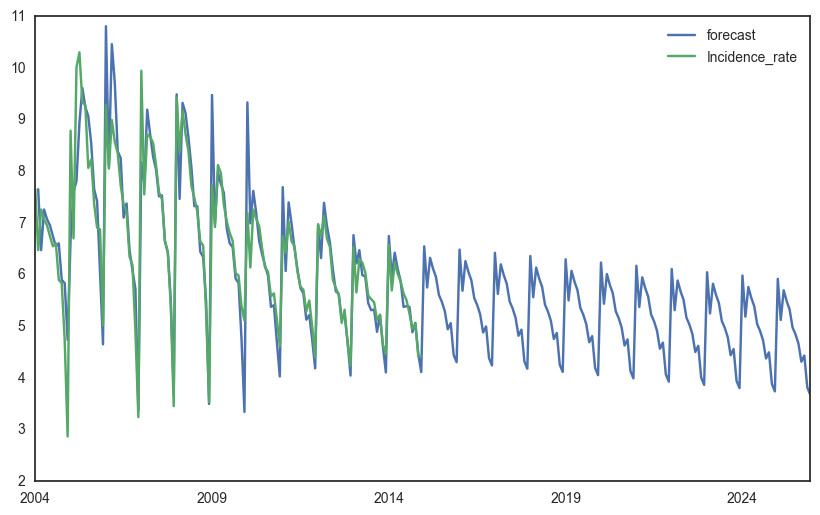

In [16]:
TB_future[['forecast','Incidence_rate']].plot(figsize=(10,6))

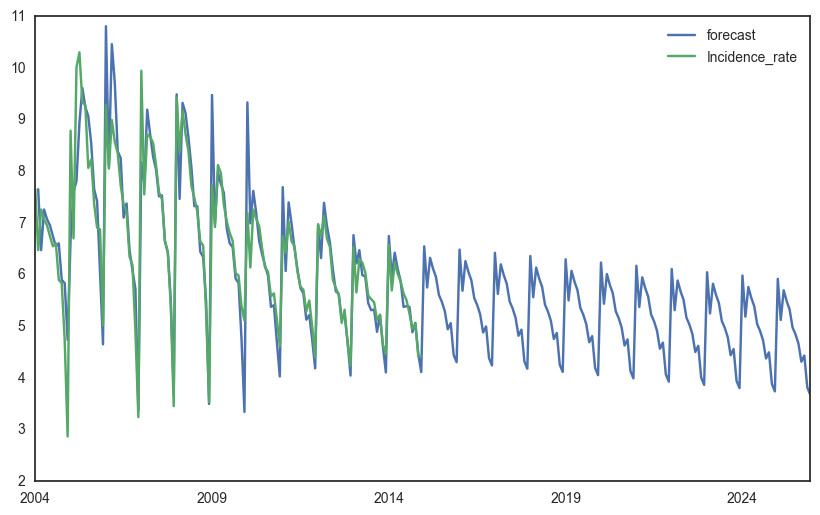

In [17]:
TB_future[['forecast','Incidence_rate']].plot(figsize=(10,6))

In [18]:
TB_future[['forecast','Incidence_rate','Year']].groupby('Year').apply(np.sum)

,forecast,Incidence_rate,Year
Year,,,
2004,71.777549,74.643736,24048.0
2005,93.253057,96.878875,24060.0
2006,91.873961,86.234749,24072.0
2007,87.501118,88.549250,24084.0
2008,88.539788,88.515012,24096.0
2009,79.683276,81.093508,24108.0
2010,75.842397,74.272892,24120.0
2011,71.381933,71.091647,24132.0
2012,70.757793,70.620700,24144.0


In [19]:
resut_model1 = TB_future.groupby('Year').apply(np.sum)
resut_model1.to_excel('SARIMA.xlsx')

In [20]:
resut_model1['forecast'].apply(lambda x:round(x,1))

Year
2004    71.8
2005    93.3
2006    91.9
2007    87.5
2008    88.5
2009    79.7
2010    75.8
2011    71.4
2012    70.8
2013    66.3
2014    65.8
2015    65.8
2016    65.1
2017    64.3
2018    63.6
2019    62.8
2020    62.0
2021    61.3
2022    60.5
2023    59.8
2024    59.0
2025    58.3
Name: forecast, dtype: float64

In [22]:
TB_future[['forecast','Incidence_rate']]

,forecast,Incidence_rate
2004-01-01,NaN,7.651937
2004-02-01,7.651937,6.474136
2004-03-01,6.474136,7.259132
2004-04-01,7.259131,7.073268
2004-05-01,7.073268,6.952873
2004-06-01,6.952873,6.743776
2004-07-01,6.743776,6.548066
2004-08-01,6.548066,6.605225
2004-09-01,6.605225,5.899468
2004-10-01,5.899468,5.833154
